In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
url = "../data_v3.csv"
df = pd.read_csv(url, header=0)

row_num = df.shape[0]
train_num = int(row_num /3*2)
test_num = -1*int(row_num /3)

col_list = ['side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value","mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

# Apply Min / Max Scaling
def scaler(col_name):
    df[col_name] = (df[col_name]-df[col_name].min())/ (df[col_name].max()-df[col_name].min())

scaler_list =  [ 'side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value", "mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

for i in scaler_list:
    scaler(i)

df['return_5d'] = df['return_5d'].replace(-1, 0)
df['return_30d'] = df['return_30d'].replace(-1, 0)
df['return_90d'] = df['return_90d'].replace(-1, 0)

X_train = df[col_list][:train_num].as_matrix()
y_train_5d = df.return_5d[:train_num].as_matrix()
y_train_30d = df.return_30d[:train_num].as_matrix()
y_train_90d = df.return_90d[:train_num].as_matrix()

X_test = df[col_list][test_num:].as_matrix()
y_test_5d = df.return_5d[test_num:].as_matrix()
y_test_30d = df.return_30d[test_num:].as_matrix()
y_test_90d = df.return_90d[test_num:].as_matrix()


C:\Anaconda3\envs\dev_env\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# create model
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

In [4]:
# Compile model
OPTIMIZER = SGD()
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [5]:
# Fit the model
history = model.fit(
    X_train, y_train_90d, epochs=1000, batch_size=128,
    validation_split=0.2,
    verbose=1,
)

Train on 27584 samples, validate on 6897 samples
Epoch 1/1000
27584/27584 [==============================] - 3s 97us/step - loss: 0.6954 - acc: 0.5041 - val_loss: 0.6923 - val_acc: 0.5270
Epoch 2/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6905 - acc: 0.5545 - val_loss: 0.6895 - val_acc: 0.5679
Epoch 3/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6871 - acc: 0.5799 - val_loss: 0.6876 - val_acc: 0.5630
Epoch 4/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6840 - acc: 0.5907 - val_loss: 0.6860 - val_acc: 0.5659
Epoch 5/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6811 - acc: 0.5970 - val_loss: 0.6846 - val_acc: 0.5488
Epoch 6/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6781 - acc: 0.5985 - val_loss: 0.6832 - val_acc: 0.5498
Epoch 7/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6749 - acc: 0.6019 - val_loss: 0.6

Epoch 59/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6167 - acc: 0.6536 - val_loss: 0.6485 - val_acc: 0.6033
Epoch 60/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6165 - acc: 0.6547 - val_loss: 0.6480 - val_acc: 0.5958
Epoch 61/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6164 - acc: 0.6537 - val_loss: 0.6486 - val_acc: 0.6087
Epoch 62/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6163 - acc: 0.6534 - val_loss: 0.6489 - val_acc: 0.6079
Epoch 63/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6162 - acc: 0.6535 - val_loss: 0.6483 - val_acc: 0.6019
Epoch 64/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6161 - acc: 0.6545 - val_loss: 0.6482 - val_acc: 0.5977
Epoch 65/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6160 - acc: 0.6539 - val_loss: 0.6481 - val_acc: 0.6035
Epoch 66/1000
27584/

27584/27584 [==============================] - 0s 13us/step - loss: 0.6145 - acc: 0.6557 - val_loss: 0.6469 - val_acc: 0.5974
Epoch 118/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6145 - acc: 0.6552 - val_loss: 0.6469 - val_acc: 0.6050
Epoch 119/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6145 - acc: 0.6549 - val_loss: 0.6473 - val_acc: 0.6106
Epoch 120/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6145 - acc: 0.6545 - val_loss: 0.6467 - val_acc: 0.6135
Epoch 121/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6145 - acc: 0.6554 - val_loss: 0.6465 - val_acc: 0.6168
Epoch 122/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6144 - acc: 0.6554 - val_loss: 0.6468 - val_acc: 0.6132
Epoch 123/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6144 - acc: 0.6544 - val_loss: 0.6474 - val_acc: 0.6095
Epoch 124/1000
27584/27584 [

27584/27584 [==============================] - 0s 17us/step - loss: 0.6139 - acc: 0.6551 - val_loss: 0.6458 - val_acc: 0.6159
Epoch 176/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6138 - acc: 0.6542 - val_loss: 0.6457 - val_acc: 0.6161
Epoch 177/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6138 - acc: 0.6549 - val_loss: 0.6461 - val_acc: 0.6153
Epoch 178/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6139 - acc: 0.6543 - val_loss: 0.6460 - val_acc: 0.6161
Epoch 179/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6138 - acc: 0.6548 - val_loss: 0.6460 - val_acc: 0.6152
Epoch 180/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6138 - acc: 0.6551 - val_loss: 0.6464 - val_acc: 0.6133
Epoch 181/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6138 - acc: 0.6549 - val_loss: 0.6468 - val_acc: 0.6142
Epoch 182/1000
27584/27584 [

27584/27584 [==============================] - 0s 17us/step - loss: 0.6134 - acc: 0.6555 - val_loss: 0.6464 - val_acc: 0.6155
Epoch 234/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6134 - acc: 0.6553 - val_loss: 0.6465 - val_acc: 0.6149
Epoch 235/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6135 - acc: 0.6555 - val_loss: 0.6463 - val_acc: 0.6123
Epoch 236/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6135 - acc: 0.6551 - val_loss: 0.6460 - val_acc: 0.6095
Epoch 237/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6136 - acc: 0.6555 - val_loss: 0.6462 - val_acc: 0.6114
Epoch 238/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6134 - acc: 0.6552 - val_loss: 0.6456 - val_acc: 0.6159
Epoch 239/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6135 - acc: 0.6559 - val_loss: 0.6460 - val_acc: 0.6126
Epoch 240/1000
27584/27584 [

27584/27584 [==============================] - 0s 17us/step - loss: 0.6132 - acc: 0.6557 - val_loss: 0.6472 - val_acc: 0.6142
Epoch 292/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6132 - acc: 0.6554 - val_loss: 0.6465 - val_acc: 0.6159
Epoch 293/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6132 - acc: 0.6549 - val_loss: 0.6468 - val_acc: 0.6126
Epoch 294/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6132 - acc: 0.6551 - val_loss: 0.6467 - val_acc: 0.6164
Epoch 295/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6132 - acc: 0.6554 - val_loss: 0.6464 - val_acc: 0.6113
Epoch 296/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6131 - acc: 0.6557 - val_loss: 0.6475 - val_acc: 0.6135
Epoch 297/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6131 - acc: 0.6553 - val_loss: 0.6478 - val_acc: 0.6111
Epoch 298/1000
27584/27584 [

27584/27584 [==============================] - 0s 17us/step - loss: 0.6128 - acc: 0.6552 - val_loss: 0.6473 - val_acc: 0.6153
Epoch 350/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6128 - acc: 0.6551 - val_loss: 0.6469 - val_acc: 0.6185
Epoch 351/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6128 - acc: 0.6554 - val_loss: 0.6466 - val_acc: 0.6168
Epoch 352/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6128 - acc: 0.6557 - val_loss: 0.6467 - val_acc: 0.6194
Epoch 353/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6129 - acc: 0.6553 - val_loss: 0.6464 - val_acc: 0.6190
Epoch 354/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6128 - acc: 0.6555 - val_loss: 0.6469 - val_acc: 0.6156
Epoch 355/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6128 - acc: 0.6564 - val_loss: 0.6470 - val_acc: 0.6164
Epoch 356/1000
27584/27584 [

27584/27584 [==============================] - 0s 14us/step - loss: 0.6124 - acc: 0.6564 - val_loss: 0.6468 - val_acc: 0.6159
Epoch 408/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6124 - acc: 0.6554 - val_loss: 0.6472 - val_acc: 0.6139
Epoch 409/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6124 - acc: 0.6557 - val_loss: 0.6479 - val_acc: 0.6136
Epoch 410/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6123 - acc: 0.6559 - val_loss: 0.6476 - val_acc: 0.5987
Epoch 411/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6124 - acc: 0.6566 - val_loss: 0.6478 - val_acc: 0.6136
Epoch 412/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6124 - acc: 0.6558 - val_loss: 0.6468 - val_acc: 0.6119
Epoch 413/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6125 - acc: 0.6557 - val_loss: 0.6475 - val_acc: 0.6148
Epoch 414/1000
27584/27584 [

27584/27584 [==============================] - 0s 15us/step - loss: 0.6120 - acc: 0.6557 - val_loss: 0.6474 - val_acc: 0.6185
Epoch 466/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6119 - acc: 0.6561 - val_loss: 0.6472 - val_acc: 0.6194
Epoch 467/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6119 - acc: 0.6562 - val_loss: 0.6479 - val_acc: 0.6036
Epoch 468/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6120 - acc: 0.6557 - val_loss: 0.6473 - val_acc: 0.6133
Epoch 469/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6119 - acc: 0.6571 - val_loss: 0.6471 - val_acc: 0.6149
Epoch 470/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6120 - acc: 0.6554 - val_loss: 0.6471 - val_acc: 0.6184
Epoch 471/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6119 - acc: 0.6554 - val_loss: 0.6480 - val_acc: 0.6143
Epoch 472/1000
27584/27584 [

27584/27584 [==============================] - 0s 14us/step - loss: 0.6114 - acc: 0.6561 - val_loss: 0.6464 - val_acc: 0.6116
Epoch 524/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6115 - acc: 0.6564 - val_loss: 0.6470 - val_acc: 0.6178
Epoch 525/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6114 - acc: 0.6562 - val_loss: 0.6471 - val_acc: 0.6139
Epoch 526/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6114 - acc: 0.6560 - val_loss: 0.6473 - val_acc: 0.5978
Epoch 527/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6114 - acc: 0.6561 - val_loss: 0.6473 - val_acc: 0.6132
Epoch 528/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6115 - acc: 0.6564 - val_loss: 0.6475 - val_acc: 0.6114
Epoch 529/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6114 - acc: 0.6567 - val_loss: 0.6472 - val_acc: 0.6101
Epoch 530/1000
27584/27584 [

27584/27584 [==============================] - 0s 12us/step - loss: 0.6108 - acc: 0.6561 - val_loss: 0.6479 - val_acc: 0.6179
Epoch 582/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6108 - acc: 0.6565 - val_loss: 0.6481 - val_acc: 0.6143
Epoch 583/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6108 - acc: 0.6570 - val_loss: 0.6481 - val_acc: 0.5997
Epoch 584/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6108 - acc: 0.6566 - val_loss: 0.6483 - val_acc: 0.6193
Epoch 585/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6108 - acc: 0.6565 - val_loss: 0.6477 - val_acc: 0.6195
Epoch 586/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6107 - acc: 0.6568 - val_loss: 0.6478 - val_acc: 0.6159
Epoch 587/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6107 - acc: 0.6563 - val_loss: 0.6484 - val_acc: 0.6120
Epoch 588/1000
27584/27584 [

27584/27584 [==============================] - 0s 16us/step - loss: 0.6087 - acc: 0.6602 - val_loss: 0.6510 - val_acc: 0.5924
Epoch 879/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6085 - acc: 0.6592 - val_loss: 0.6514 - val_acc: 0.5919
Epoch 880/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6086 - acc: 0.6601 - val_loss: 0.6516 - val_acc: 0.5923
Epoch 881/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6085 - acc: 0.6615 - val_loss: 0.6507 - val_acc: 0.5914
Epoch 882/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6084 - acc: 0.6610 - val_loss: 0.6515 - val_acc: 0.5919
Epoch 883/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6084 - acc: 0.6602 - val_loss: 0.6515 - val_acc: 0.5948
Epoch 884/1000
27584/27584 [==============================] - 1s 23us/step - loss: 0.6085 - acc: 0.6611 - val_loss: 0.6512 - val_acc: 0.5930
Epoch 885/1000
27584/27584 [

27584/27584 [==============================] - 0s 18us/step - loss: 0.6084 - acc: 0.6608 - val_loss: 0.6524 - val_acc: 0.5982
Epoch 937/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6084 - acc: 0.6614 - val_loss: 0.6518 - val_acc: 0.5966
Epoch 938/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6084 - acc: 0.6610 - val_loss: 0.6526 - val_acc: 0.5988
Epoch 939/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6085 - acc: 0.6615 - val_loss: 0.6522 - val_acc: 0.5945
Epoch 940/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6083 - acc: 0.6614 - val_loss: 0.6532 - val_acc: 0.5990
Epoch 941/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6085 - acc: 0.6607 - val_loss: 0.6524 - val_acc: 0.5956
Epoch 942/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6083 - acc: 0.6616 - val_loss: 0.6522 - val_acc: 0.5972
Epoch 943/1000
27584/27584 [

27584/27584 [==============================] - 0s 14us/step - loss: 0.6081 - acc: 0.6622 - val_loss: 0.6525 - val_acc: 0.5953
Epoch 995/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6081 - acc: 0.6609 - val_loss: 0.6528 - val_acc: 0.5945
Epoch 996/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6080 - acc: 0.6628 - val_loss: 0.6529 - val_acc: 0.5921
Epoch 997/1000
27584/27584 [==============================] - 1s 21us/step - loss: 0.6081 - acc: 0.6615 - val_loss: 0.6536 - val_acc: 0.5946
Epoch 998/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6080 - acc: 0.6611 - val_loss: 0.6526 - val_acc: 0.5921
Epoch 999/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6081 - acc: 0.6610 - val_loss: 0.6524 - val_acc: 0.5908
Epoch 1000/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6081 - acc: 0.6621 - val_loss: 0.6534 - val_acc: 0.5994


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C864C84B38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C8652D83C8>]], dtype=object)

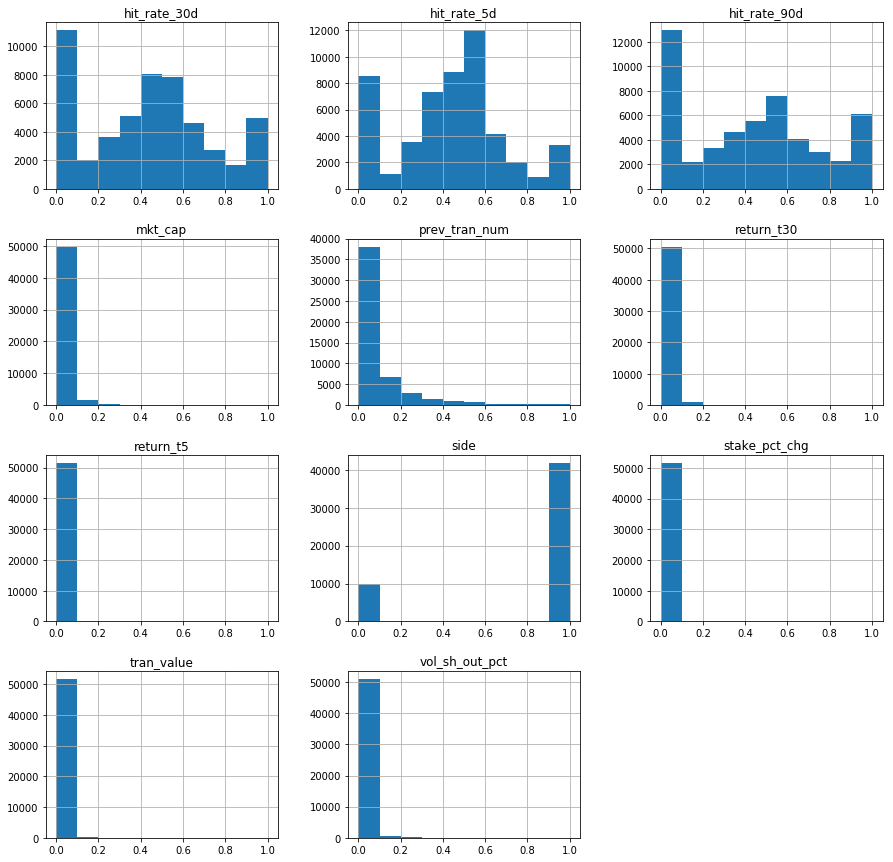

In [6]:
df[col_list].hist(figsize = [15,15])

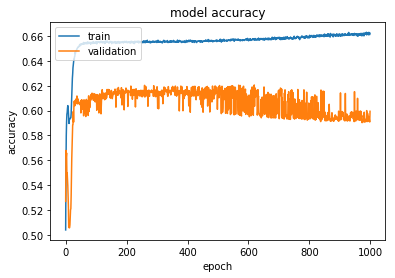

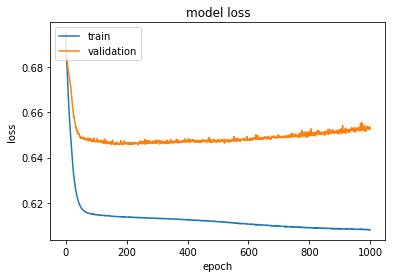

In [7]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
# evaluate the model
scores = model.evaluate(X_train, y_train_90d)
print("[Train] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test, y_test_90d)
print("[Test] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

34481/34481 [==============================] - 1s 35us/step
[Train] acc: 64.98%
17240/17240 [==============================] - 1s 44us/step
[Test] acc: 63.05%
